# Text Classification Blurr

## Setting Up Necessary Things

In [1]:
# Jupyter Notebook Magic Command - Auto Reloading
%reload_ext autoreload
%autoreload 2

# Jupyter Notebook Magic Command - Inline Plotting
%matplotlib inline

In [2]:
# Ignore All Warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# NVIDIA Status
! nvidia-smi

Thu Aug 17 12:47:47 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd /content/drive/MyDrive/Colab Notebooks/TC.Video.Game

/content/drive/MyDrive/Colab Notebooks/TC.Video.Game


## Necessary Imports

In [6]:
! pip install -q transformers[sentencepiece] fastbook fastai ohmeow-blurr nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 40.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 65.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 74.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 54.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [7]:
import torch

from transformers import AutoModelForSequenceClassification, AutoConfig

from fastai.text.all import *

from blurr.text.data.all import *
from blurr.text.modeling.all import *

## Data Cleaning

In [8]:
# Load Data Into DataFrame
df = pd.read_csv("data/raw_data/game_details.csv")
df.head()

,Name,Summary,Genres
0,The Legend of Zelda: Ocarina of Time,"As a young boy, Link is tricked by Ganondorf, the King of the Gerudo Thieves. The evil human uses Link to gain access to the Sacred Realm, where he places his tainted hands on Triforce and transforms the beautiful Hyrulean landscape into a barren wasteland. Link is determined to fix the problems he helped to create, so with the help of Rauru he travels through time gathering the powers of the Seven Sages.","['Action Adventure', 'Fantasy']"
1,Tony Hawk's Pro Skater 2,"As most major publishers' development efforts shift to any number of next-generation platforms, Tony Hawk 2 will likely stand as one of the last truly fantastic games to be released on the PlayStation.","['Sports', 'Alternative', 'Skateboarding']"
2,Grand Theft Auto IV,"[Metacritic's 2008 PS3 Game of the Year; Also known as ""GTA IV""] What does the American Dream mean today? For Niko Belic, fresh off the boat from Europe. It's the hope he can escape his past. For his cousin, Roman, it is the vision that together they can find fortune in Liberty City, gateway to the land of opportunity. As they slip into debt and are dragged into a criminal underworld by a series of shysters, thieves and sociopaths, they discover that the reality is very different from the dream in a city that worships money and status, and is heaven for those who have them an a living nigh...","['Action Adventure', 'Modern', 'Modern', 'Open-World']"
3,SoulCalibur,"This is a tale of souls and swords, transcending the world and all its history, told for all eternity... The greatest weapons-based fighter returns, this time on Sega Dreamcast. Soul Calibur unleashes incredible graphics, fantastic fighters, and combos so amazing they'll make your head spin!","['Action', 'Fighting', '3D']"
4,Grand Theft Auto IV,"[Metacritic's 2008 Xbox 360 Game of the Year; Also known as ""GTA IV""] What does the American Dream mean today? For Niko Belic, fresh off the boat from Europe. It's the hope he can escape his past. For his cousin, Roman, it is the vision that together they can find fortune in Liberty City, gateway to the land of opportunity. As they slip into debt and are dragged into a criminal underworld by a series of shysters, thieves and sociopaths, they discover that the reality is very different from the dream in a city that worships money and status, and is heaven for those who have them an a living...","['Action Adventure', 'Modern', 'Modern', 'Open-World']"


In [9]:
# Shape of the DataFrame
df.shape

(20406, 3)

### Total Number of Genres

In [10]:
genres_list = df["Genres"].to_list()    # list of all the genres
genres_count = {}                       # count of all the genres

for genres in genres_list:
    genre_list = eval(genres)

    for genre in genre_list:
        if genre in genres_count.keys():
            genres_count[genre] += 1
        else:
            genres_count[genre] = 1

In [11]:
print("Total Number of Genres: ", len(genres_count))

sorted_genres_count = dict(sorted(genres_count.items(), key=lambda item: item[1], reverse=True))
print("Individual Genres Count: \n", sorted_genres_count)

Total Number of Genres:  178
Individual Genres Count: 
 {'Action': 7097, 'General': 7035, 'Shooter': 3549, 'Action Adventure': 3424, 'Platformer': 2371, 'Arcade': 2355, 'Role-Playing': 2341, '3D': 2127, 'Adventure': 1995, '2D': 1979, 'Miscellaneous': 1927, 'Strategy': 1905, 'First-Person': 1875, 'Sci-Fi': 1779, 'Fantasy': 1729, 'Sports': 1727, 'Modern': 1569, 'Puzzle': 1376, 'Action RPG': 1300, 'Racing': 1239, 'Sim': 1162, 'Simulation': 1160, 'Third-Person': 1040, 'Traditional': 1015, 'Driving': 971, 'Historic': 915, 'Fighting': 838, 'Automobile': 782, 'Real-Time': 772, 'Turn-Based': 740, 'Open-World': 736, "Beat-'Em-Up": 713, 'Team': 619, 'Compilation': 546, 'Survival': 544, 'Individual': 450, "Shoot-'Em-Up": 433, 'Point-and-Click': 430, 'Horror': 419, 'Japanese-Style': 415, 'Music': 411, 'Tactical': 405, 'Tactics': 392, 'Combat': 382, 'Linear': 353, 'Console-style RPG': 346, 'Rhythm': 340, 'Management': 334, 'GT / Street': 283, 'Western-Style': 279, 'Soccer': 276, 'Scrolling': 264, '

### Using Only 1st Category of the Genres: Single-Label Classification

In [12]:
primary_genre_list = []    # only first genre
indices_to_drop = []       # empty genre indices drop

for idx, genres in enumerate(df["Genres"].to_list()):
    genres_list = eval(genres)

    if len(genres_list) != 0:
        primary_genre_list.append(genres_list[0])
    else:
        indices_to_drop.append(idx)

In [13]:
# Total Primary Genres
print("Total Primary Genres: ", len(primary_genre_list))
print(primary_genre_list)

# Total Indices to Drop
print("Total Indices to Drop: ", len(indices_to_drop))

Total Primary Genres:  19894
['Action Adventure', 'Sports', 'Action Adventure', 'Action', 'Action Adventure', 'Action Adventure', 'Sports', 'Action Adventure', 'Action', 'Action Adventure', 'Action Adventure', 'Sports', 'Action Adventure', 'Action', 'Action Adventure', 'Action Adventure', 'Sports', 'Action Adventure', 'Action', 'Action Adventure', 'Action', 'Action', 'Action Adventure', 'Action Adventure', 'Modern', 'Role-Playing', 'Modern', 'Sports', 'Action Adventure', 'Role-Playing', 'Sports', 'Action', 'Action Adventure', 'Action Adventure', 'Action', 'Action Adventure', 'Action', 'Action', 'Sports', 'Action', 'Modern', 'Fantasy', 'Action', 'Action', 'Action Adventure', 'Action Adventure', 'Action', 'Action', 'Action Adventure', 'Action', 'Role-Playing', 'Role-Playing', 'Adventure', 'Action Adventure', 'Role-Playing', 'Action', 'Role-Playing', 'Action Adventure', 'Action Adventure', 'Driving', 'Action Adventure', 'Action', 'Action Adventure', 'Miscellaneous', 'Miscellaneous', 'Role

In [14]:
# Drop Empty Genre Data
df = df.drop(indices_to_drop).reset_index(drop=True)

In [15]:
# Create a Column Named Primary Genre
df["Primary Genre"] = primary_genre_list

In [16]:
# Individual Primary Genre Values Count
print("Primary Genre Value Count: ")
df["Primary Genre"].value_counts()

Primary Genre Value Count: 


Action                6436
Action Adventure      2579
Role-Playing          2081
Sports                1620
Strategy              1608
                      ... 
Party / Minigame         1
Survival                 1
Street                   1
Dancing                  1
Online Multiplayer       1
Name: Primary Genre, Length: 70, dtype: int64

In [17]:
# After Inserting Primary Genre
df.head()

,Name,Summary,Genres,Primary Genre
0,The Legend of Zelda: Ocarina of Time,"As a young boy, Link is tricked by Ganondorf, the King of the Gerudo Thieves. The evil human uses Link to gain access to the Sacred Realm, where he places his tainted hands on Triforce and transforms the beautiful Hyrulean landscape into a barren wasteland. Link is determined to fix the problems he helped to create, so with the help of Rauru he travels through time gathering the powers of the Seven Sages.","['Action Adventure', 'Fantasy']",Action Adventure
1,Tony Hawk's Pro Skater 2,"As most major publishers' development efforts shift to any number of next-generation platforms, Tony Hawk 2 will likely stand as one of the last truly fantastic games to be released on the PlayStation.","['Sports', 'Alternative', 'Skateboarding']",Sports
2,Grand Theft Auto IV,"[Metacritic's 2008 PS3 Game of the Year; Also known as ""GTA IV""] What does the American Dream mean today? For Niko Belic, fresh off the boat from Europe. It's the hope he can escape his past. For his cousin, Roman, it is the vision that together they can find fortune in Liberty City, gateway to the land of opportunity. As they slip into debt and are dragged into a criminal underworld by a series of shysters, thieves and sociopaths, they discover that the reality is very different from the dream in a city that worships money and status, and is heaven for those who have them an a living nigh...","['Action Adventure', 'Modern', 'Modern', 'Open-World']",Action Adventure
3,SoulCalibur,"This is a tale of souls and swords, transcending the world and all its history, told for all eternity... The greatest weapons-based fighter returns, this time on Sega Dreamcast. Soul Calibur unleashes incredible graphics, fantastic fighters, and combos so amazing they'll make your head spin!","['Action', 'Fighting', '3D']",Action
4,Grand Theft Auto IV,"[Metacritic's 2008 Xbox 360 Game of the Year; Also known as ""GTA IV""] What does the American Dream mean today? For Niko Belic, fresh off the boat from Europe. It's the hope he can escape his past. For his cousin, Roman, it is the vision that together they can find fortune in Liberty City, gateway to the land of opportunity. As they slip into debt and are dragged into a criminal underworld by a series of shysters, thieves and sociopaths, they discover that the reality is very different from the dream in a city that worships money and status, and is heaven for those who have them an a living...","['Action Adventure', 'Modern', 'Modern', 'Open-World']",Action Adventure


### Removing Rare Genres

In [18]:
genre_count = df["Primary Genre"].value_counts()
threshold = int(len(df) * 0.004)

rare_genres = [item for item, count in genre_count.items() if count < threshold]

print("Total Rare Genres: ", len(rare_genres))

Total Rare Genres:  58


In [19]:
# Rare indices to drop
rare_indices_to_drop = [index for index, row in df.iterrows() if row["Primary Genre"] in rare_genres]

print("Total Rare Indices to Drop: ", len(rare_indices_to_drop))

Total Rare Indices to Drop:  493


In [20]:
# Drop Rare Genres
df = df.drop(rare_indices_to_drop).reset_index(drop=True)

In [21]:
# Shape After Dropping Rare Genres
df.shape

(19401, 4)

In [22]:
# Show Remaining Primary Genres
print("Total Remaining Genres Count: ", len(df["Primary Genre"].value_counts()))

print("Individual Genres Count: ")
df["Primary Genre"].value_counts()

Total Remaining Genres Count:  12
Individual Genres Count: 


Action              6436
Action Adventure    2579
Role-Playing        2081
Sports              1620
Strategy            1608
Miscellaneous       1366
Adventure           1346
Driving              921
Simulation           640
Racing               355
General              249
Puzzle               200
Name: Primary Genre, dtype: int64

In [23]:
# Drop Genres Column
df.drop(["Genres"], axis = 1, inplace = True)

In [24]:
# Drop Duplicate Summary from the DataFrame
df = df.drop_duplicates(subset = "Summary", keep='first')

In [25]:
# Get Labels
labels = list(set(df["Primary Genre"].to_list()))
label_count = len(labels)

print("Total Label Count: ", label_count)
print("Labels: ", labels)

Total Label Count:  12
Labels:  ['General', 'Sports', 'Driving', 'Strategy', 'Adventure', 'Racing', 'Action', 'Action Adventure', 'Miscellaneous', 'Role-Playing', 'Puzzle', 'Simulation']


In [26]:
# Total Null Values in the Columns
df.isna().sum()

Name             0
Summary          1
Primary Genre    0
dtype: int64

In [27]:
# Drop Null Values
df = df.dropna()

In [28]:
# Description of The DataFrame
df.describe(include="object")

,Name,Summary,Primary Genre
count,15037,15037,15037
unique,12411,15037,12
top,MX vs. ATV Untamed,"As a young boy, Link is tricked by Ganondorf, the King of the Gerudo Thieves. The evil human uses Link to gain access to the Sacred Realm, where he places his tainted hands on Triforce and transforms the beautiful Hyrulean landscape into a barren wasteland. Link is determined to fix the problems he helped to create, so with the help of Rauru he travels through time gathering the powers of the Seven Sages.",Action
freq,6,1,4915


## Data-Loaders and Model Setup

In [29]:
model_cls = AutoModelForSequenceClassification

model_name = "distilroberta-base"

config = AutoConfig.from_pretrained(model_name)
config.num_labels = label_count

hf_arch, hf_config, hf_tokenizer, hf_model = get_hf_objects(model_name, model_cls=model_cls, config=config)

In [30]:
blocks = (TextBlock(hf_arch, hf_config, hf_tokenizer, hf_model), CategoryBlock)
dblock = DataBlock(blocks=blocks, get_x=ColReader("Summary"), get_y=ColReader("Primary Genre"), splitter=RandomSplitter(valid_pct=0.1, seed=42))

In [31]:
dls = dblock.dataloaders(df, bs=32)
torch.save(dls, "dataloaders/dls-game-classifier.pkl")

In [32]:
# dls = torch.load("dataloaders/dls-game-classifier.pkl")

In [33]:
dls.show_batch(dataloaders=dls, max_n=3, trunc_at=500)

,text,target
0,"In The Eternal Cylinder, players control a herd of adorable creatures called Trebhums and must explore a strange alien world filled with exotic lifeforms, surreal environments, and the constant threat of the Cylinder, a gargantuan rolling structure of ancient origin which crushes everything in its path. This unique ecosystem is a massive, procedurally generated land with unique animal AI, real-time world destruction, and organic exploration and puzzle design to create emergent gameplay that ens",Action Adventure
1,"You are an exile, outcast and downtrodden, sentenced to walk in a barbaric wasteland where the weak are crushed and only the strong can live. Here you must fight to survive, build, and dominate the world alone on your own server, or with enemies and allies in online multiplayer. Journey through a vast, seamless world filled with the ruins of ancient civilizations and uncover its dark history and buried secrets as you seek to conquer and dominate the exiled lands yourself. Start with nothing but",Action
2,"Diablo® Immortal is a mobile Massively Multiplayer Online Action RPG (MMOARPG) developed by Blizzard Entertainment in partnership with NetEase, coming exclusively to Android, iPhone and iPad. Experience the world of Sanctuary in a persistent, always-online adventure anywhere, anytime. Join a worldwide community as you battle side by side to vanquish ancient evils, explore perilous dungeons, and of course, get legendary loot. * The Story: An Untold Chapter of the Diablo Saga The Worldstone lies",Strategy


In [34]:
model = BaseModelWrapper(hf_model)

learner = Learner(
                dls,
                model,
                opt_func=partial(OptimWrapper, opt=torch.optim.AdamW),
                loss_func=PreCalculatedCrossEntropyLoss(),                # CrossEntropyLossFlat(),
                metrics=[accuracy],
                cbs=[BaseModelCallback],
                splitter=blurr_splitter,
            ).to_fp16()

In [35]:
learner.model

BaseModelWrapper(
  (hf_model): RobertaForSequenceClassification(
    (roberta): RobertaModel(
      (embeddings): RobertaEmbeddings(
        (word_embeddings): Embedding(50265, 768, padding_idx=1)
        (position_embeddings): Embedding(514, 768, padding_idx=1)
        (token_type_embeddings): Embedding(1, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (encoder): RobertaEncoder(
        (layer): ModuleList(
          (0): RobertaLayer(
            (attention): RobertaAttention(
              (self): RobertaSelfAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768, bias=True)
                (dropout): Dropout(p=0.1, inplace=False)
              )
              (output): RobertaSelfOutput(
                (dense): Li

### Stage: 0

In [36]:
learner.freeze()

SuggestedLRs(minimum=0.0006309573538601399, steep=0.0010000000474974513)

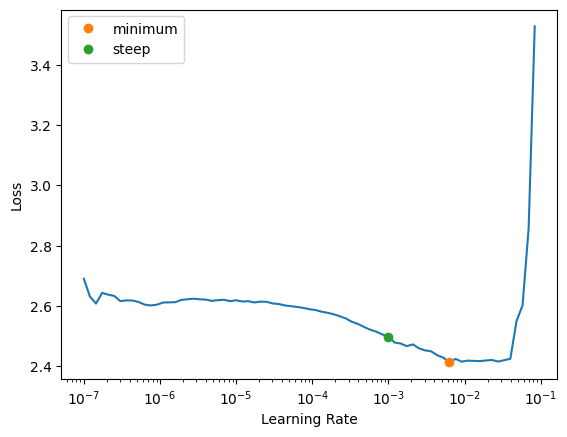

In [37]:
learner.lr_find(suggest_funcs=[minimum, steep])

In [38]:
learner.fit_one_cycle(2, 8.25e-4)

epoch,train_loss,valid_loss,accuracy,time
0,2.104715,2.120392,0.329341,00:54
1,2.090070,2.097643,0.329341,00:54


In [39]:
learner.save("game-classifier-stage-0")

Path('models/game-classifier-stage-0.pth')

In [40]:
learner.export("models/game-classifier-stage-0.pkl")

### Stage: 1

In [41]:
# learner.load("game-classifier-stage-0")

In [42]:
learner.unfreeze()

SuggestedLRs(slide=0.0004786300996784121, valley=1.2022644114040304e-05)

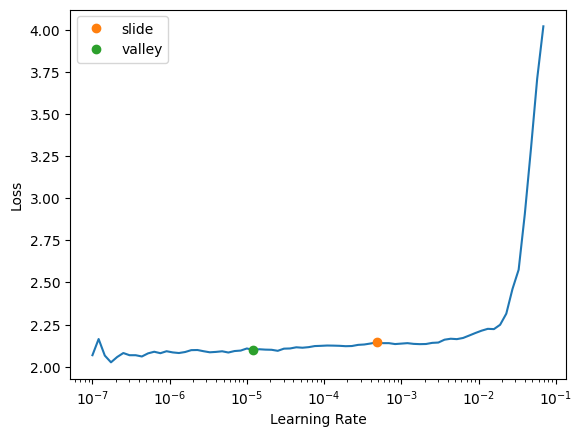

In [43]:
learner.lr_find(suggest_funcs=[slide, valley])

In [44]:
learner.fit_one_cycle(5, slice(4.25e-4, 1e-5))

epoch,train_loss,valid_loss,accuracy,time
0,2.113930,2.101285,0.329341,01:17
1,2.112108,2.104288,0.329341,01:14
2,2.127075,2.100630,0.329341,01:14
3,2.105670,2.098200,0.329341,01:16
4,2.098139,2.097273,0.329341,01:17


In [45]:
learner.save("game-classifier-stage-1")

Path('models/game-classifier-stage-1.pth')

In [46]:
learner.export("models/game-classifier-stage-1.pkl")